# Mental Health Prediction in Adolescents using Ml

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

from subprocess import check_output

In [3]:
data = pd.read_csv('C:/Users/prant/Downloads/survey.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


# Cleaning

In [4]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Now we will check self-employed and work interfere in the data

In [5]:
data = data.drop('comments', axis=1)

In [6]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [7]:
data['self_employed'].mode()

0    No
dtype: object

In [8]:
data['self_employed'] = data['self_employed'].fillna('No')

In [9]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [10]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [11]:
data['work_interfere'] = data['work_interfere'].fillna('Sometimes')

# Feature Engineering¶

Feature engineering is using data and creating new features out of it

In [12]:
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,Sometimes,100-500,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [13]:
data['Timestamp']


0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [14]:
data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
data['Month'] = data['Timestamp'].apply(lambda x: np.int(x[5:7]))
data['Day'] = data['Timestamp'].apply(lambda x: np.int(x[8:10]))

data['Hour'] = data['Timestamp'].apply(lambda x: np.int(x[11:13]))
data['Minute'] = data['Timestamp'].apply(lambda x: np.int(x[14:16]))
data['Second'] = data['Timestamp'].apply(lambda x: np.int(x[17:19]))

data = data.drop('Timestamp', axis=1)

C:\Users\prant\AppData\Local\Temp/ipykernel_4316/894510929.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['Year'] = data['Timestamp'].apply(lambda x: np.int(x[0:4]))
C:\Users\prant\AppData\Local\Temp/ipykernel_4316/894510929.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

In [15]:
data


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,No,Maybe,Yes,No,2014,8,27,11,29,31
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,No,No,Don't know,No,2014,8,27,11,29,37
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,...,Yes,Yes,No,No,2014,8,27,11,29,44
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,...,No,No,Don't know,No,2015,9,12,11,17,21
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,No,No,Yes,No,2015,9,26,1,7,35
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,No,No,No,No,2015,11,7,12,36,58
1257,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,...,No,No,No,No,2015,11,30,21,25,6


# Encoding Features

To find out how many unique values in each categorial column

data columns will give us the numerical columns directly but here using data.select_dtypes will give us a list of all of the object columns it is a very nice way to visualize how many different values we have in each column

In [16]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

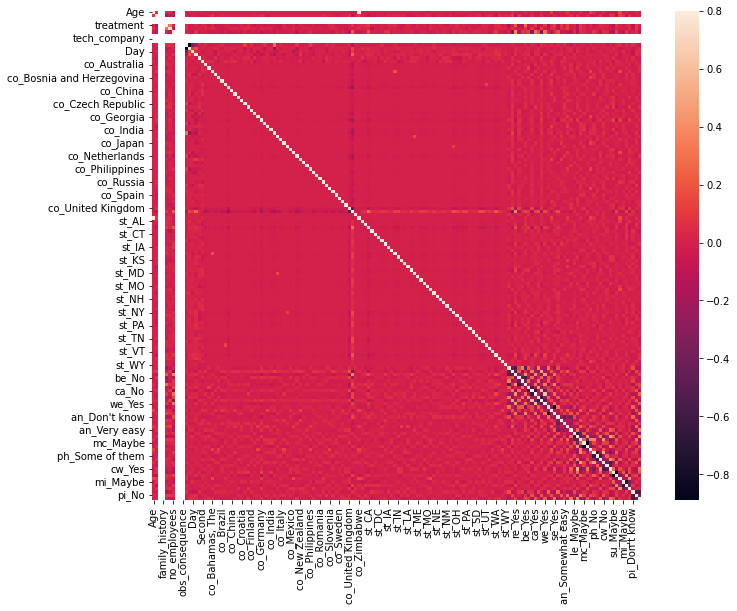

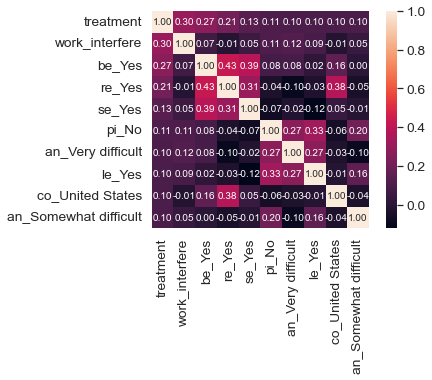

In [43]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Some charts to see data relationship

C:\Users\prant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

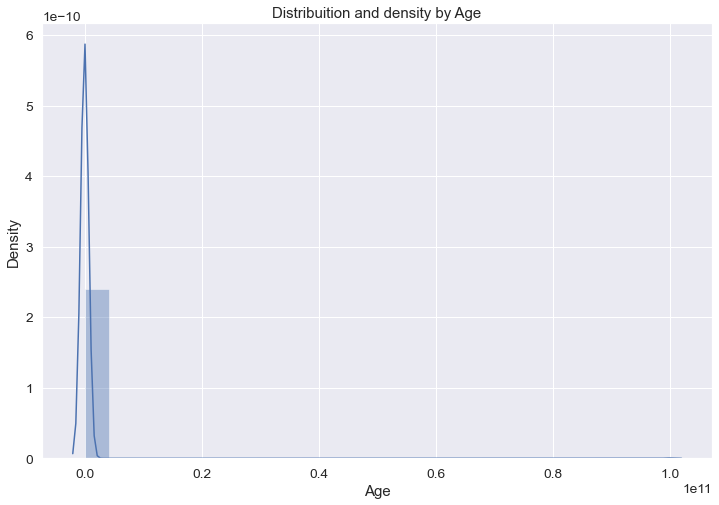

In [45]:
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

C:\Users\prant\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


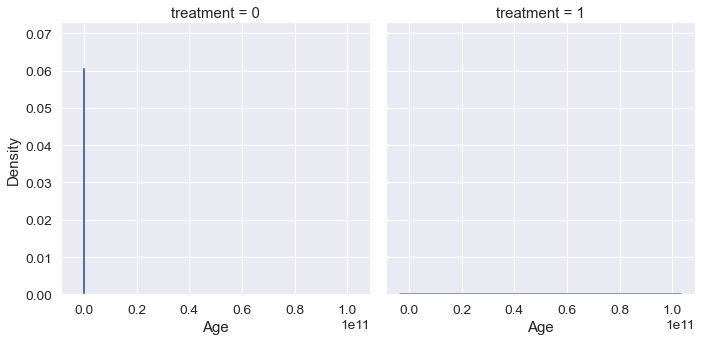

In [46]:
g = sns.FacetGrid(data, col='treatment', size=5)
g = g.map(sns.distplot, "Age")

In [17]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [19]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [20]:
data['Gender'] = data['Gender'].apply(encode_gender)

In [21]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [22]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [51]:
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Age [-1726, -29, -1, 5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72, 329, 99999999999]
label_Gender [0, 1, 2]
label_self_employed [0]
label_family_history [0]
label_treatment [0, 1]
label_work_interfere [0, 1, 2, 3]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0]
label_tech_company [0]
label_obs_consequence [0]
label_Year [2014, 2015, 2016]
label_Month [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]
label_Day [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
label_Hour [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
label_Minute [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

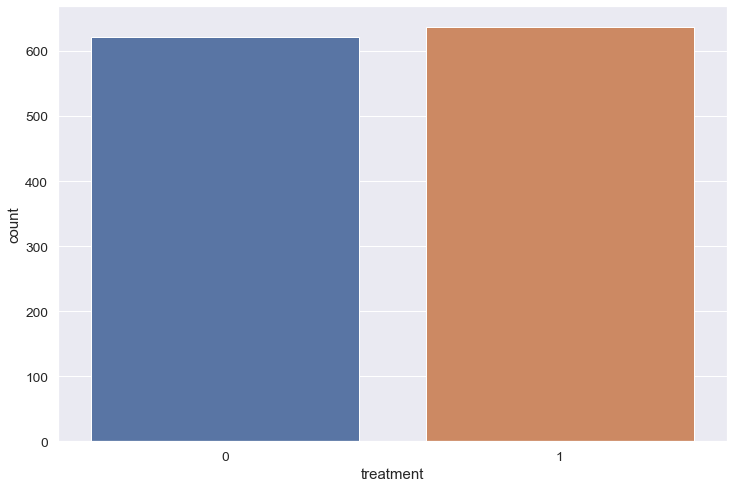

In [52]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=data)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


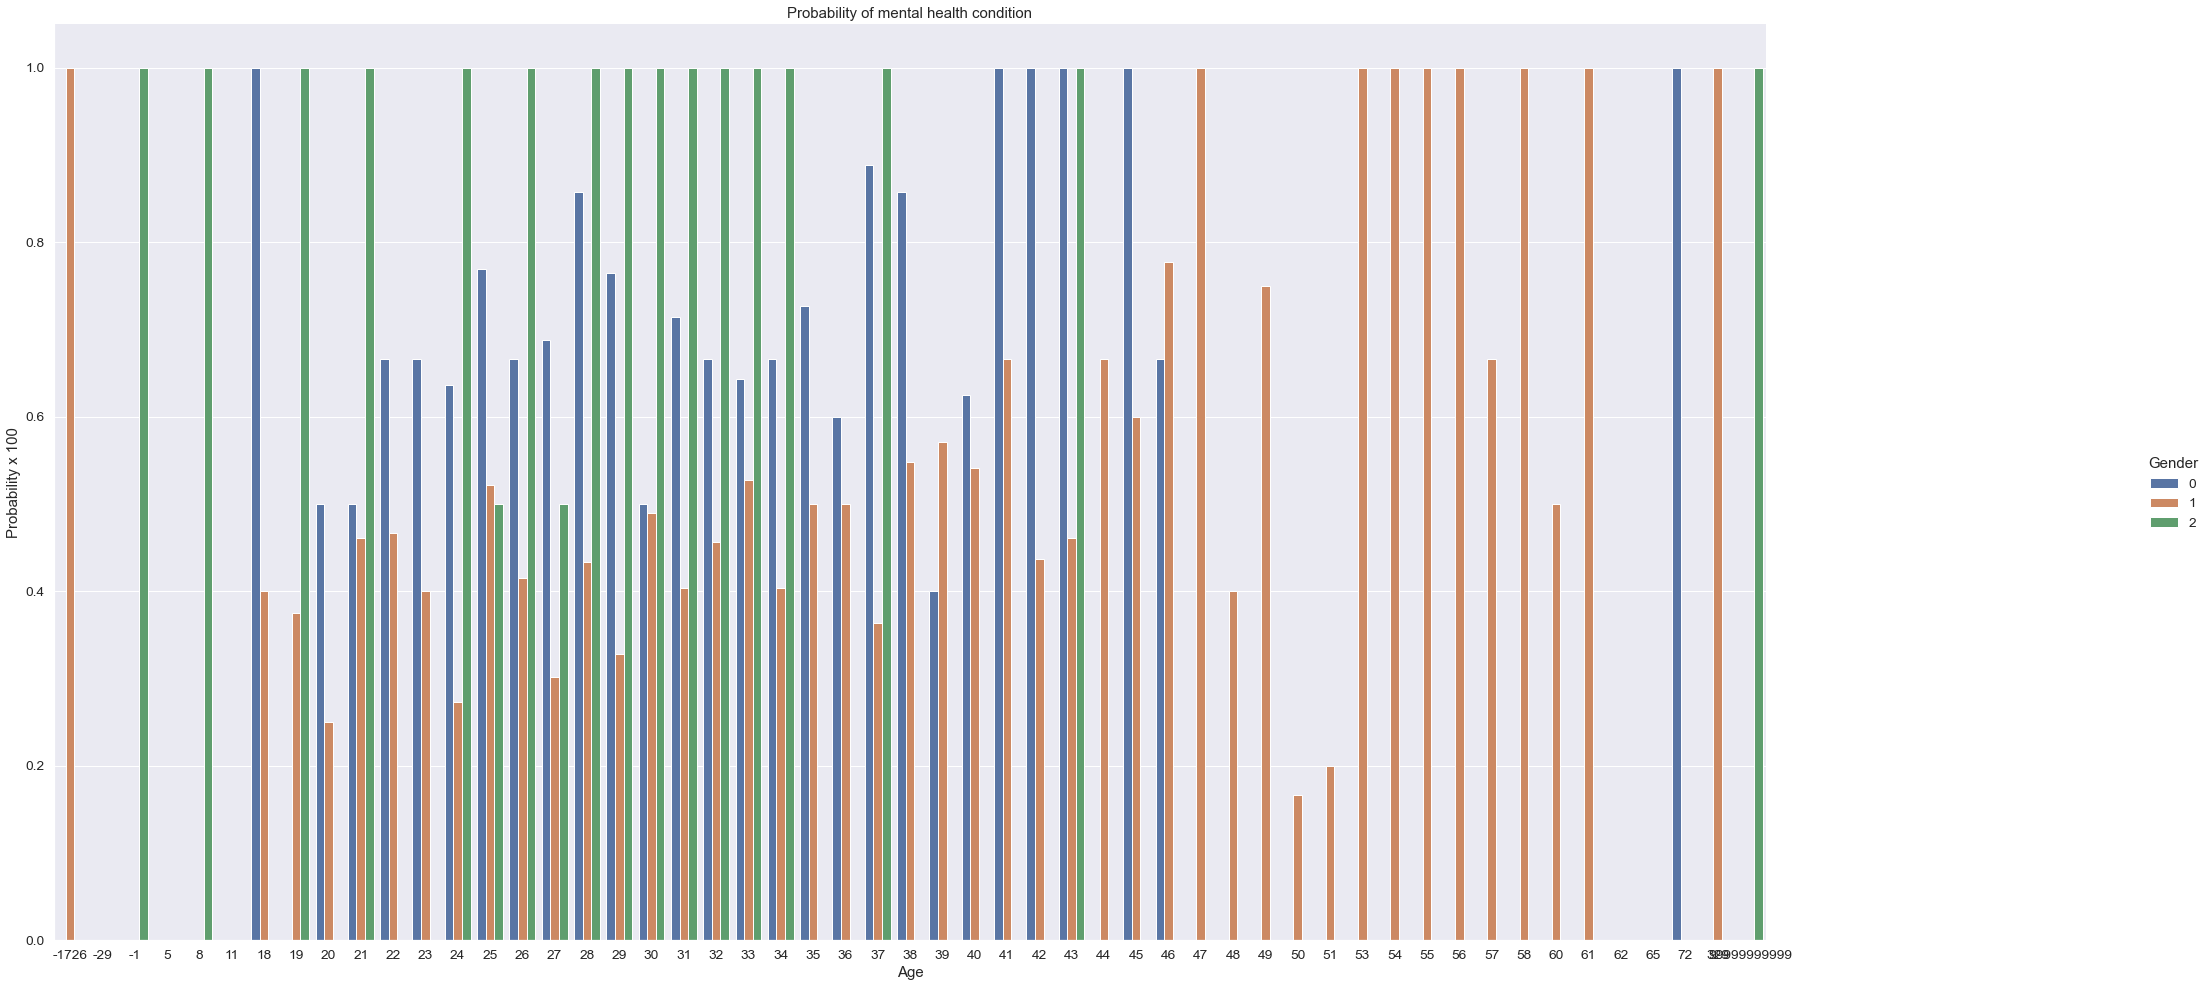

In [65]:
o = labelDict['label_Age']

g = sns.factorplot(x="Age", y="treatment", hue="Gender", data=data, kind="bar",  ci=None, size=15, aspect=2, legend_out = True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


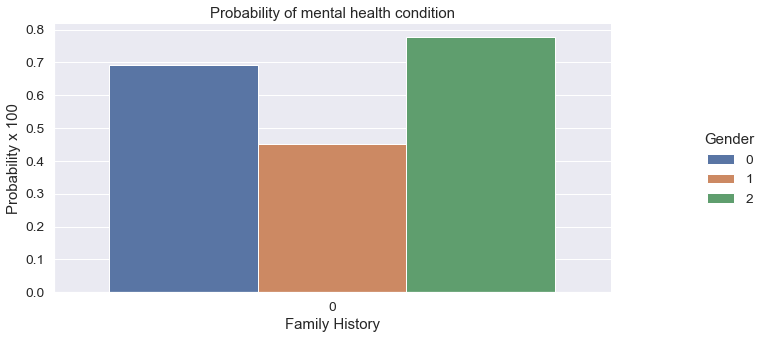

In [67]:
o = labelDict['label_family_history']
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=data, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()


C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


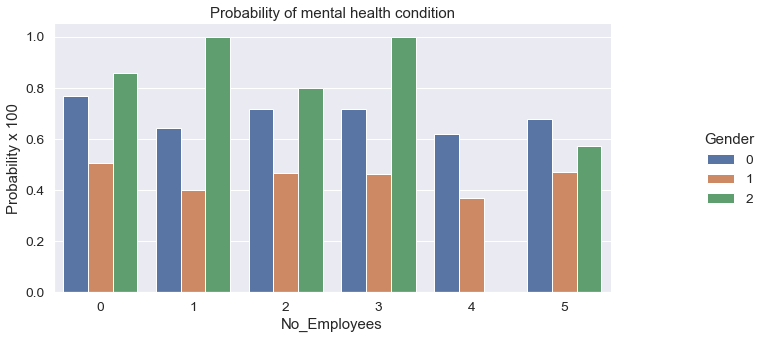

In [70]:
o = labelDict['label_no_employees']
g = sns.factorplot(x="no_employees", y="treatment", hue="Gender", data=data, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('No_Employees')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


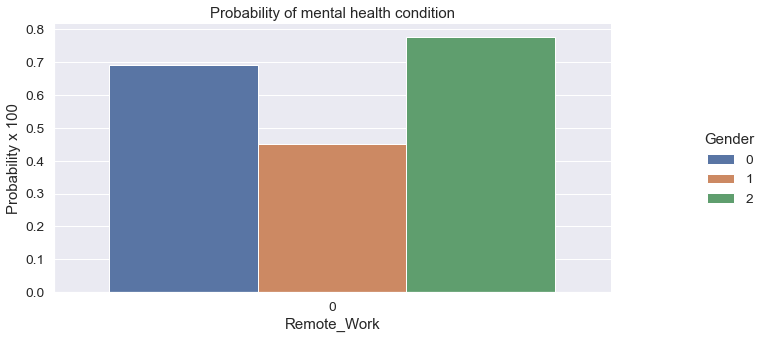

In [74]:
o = labelDict['label_remote_work']
g = sns.factorplot(x="remote_work", y="treatment", hue="Gender", data=data, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Remote_Work')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prant\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


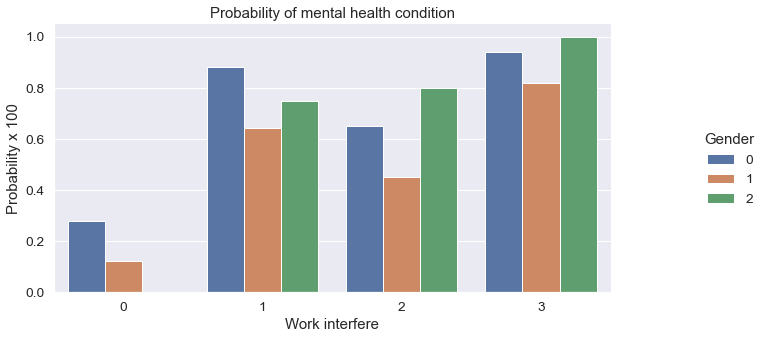

In [75]:
o = labelDict['label_work_interfere']
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=data, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()


# Scaling and fitting

In [76]:
# Scaling Age
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,0.480769,0,0,0,1,3,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0.615385,1,0,0,0,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0.384615,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0.365385,1,0,0,1,3,2,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0.365385,1,0,0,0,0,3,0,0,0,...,1,0,0,1,0,0,1,1,0,0


In [82]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'no_employees', 'self_employed', 'family_history','work_interfere']
X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

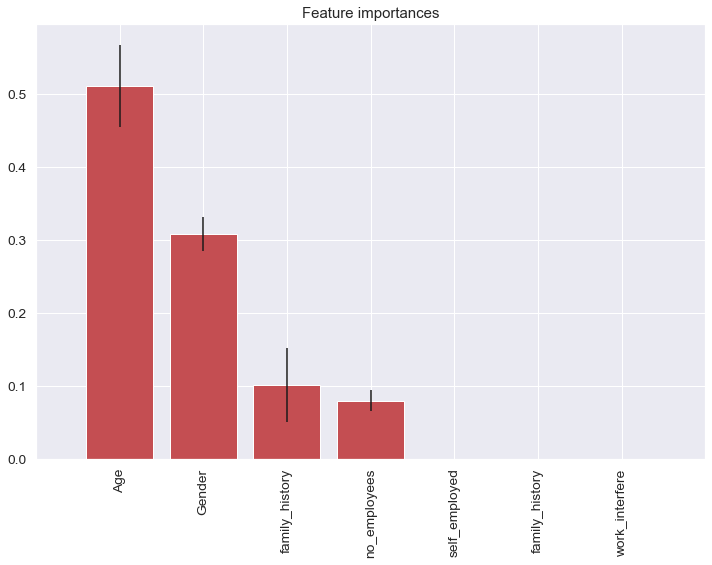

In [83]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


# Tuning

In [85]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    
   
    print('Null accuracy:\n', y_test.value_counts())
    
   
    print('Percentage of ones:', y_test.mean())
    
    
    print('Percentage of zeros:',1 - y_test.mean())
    
    
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
  
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
   
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
   
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    

    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])

   
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])

    
    model.predict_proba(X_test)[0:10, 1]
    
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    if plot == True:
       
        plt.rcParams['font.size'] = 12
        
        plt.hist(y_pred_prob, bins=8)
        
        
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
   
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, 0.3)[0]
    
    
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
   
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    
    
    def evaluate_threshold(threshold):
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

   
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    
    return accuracy

# Tuning with cross validation score

In [99]:
def tuningCV(knn):
    
    
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

# Tuning using GridSearchCV

In [100]:
def tuningGridSerach(knn):
    
    k_range = list(range(1, 31))
    print(k_range)
  
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)
    
    
    grid.grid_scores_
    
    
    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)
    
    
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    
    
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

# TuningRandomizedSearchCV

In [108]:
def tuningRandomizedSearchCV(model, param_dist):
   
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
   
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)
    
    
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

# Tuning with searching multiple parameters simultaneously

In [109]:
def tuningMultParam(knn):
    
    
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
        
    
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid) 
    
    
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y) 
    
    
    print(grid.grid_scores_)
    
   
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

# Logistic Regression

In [110]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('########### Logistic Regression ###############')
    
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)
    
    #Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

########### Logistic Regression ###############
Accuracy: 0.5873015873015873
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0]


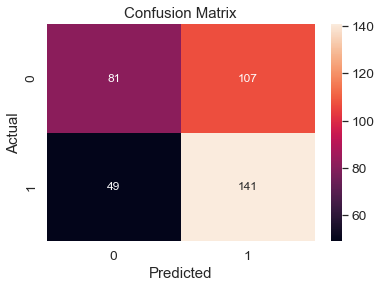

Classification Accuracy: 0.5873015873015873
Classification Error: 0.4126984126984127
False Positive Rate: 0.5691489361702128
Precision: 0.5685483870967742
AUC Score: 0.586478163493841
Cross-validated AUC: 0.6735210037569389
First 10 predicted responses:
 [1 1 1 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.44485269 0.55514731]
 [0.49144049 0.50855951]
 [0.46082792 0.53917208]
 [0.46592448 0.53407552]
 [0.49445191 0.50554809]
 [0.37297855 0.62702145]
 [0.81772789 0.18227211]
 [0.35222455 0.64777545]
 [0.16269584 0.83730416]
 [0.24362732 0.75637268]]


TypeError: binarize() takes 1 positional argument but 2 were given

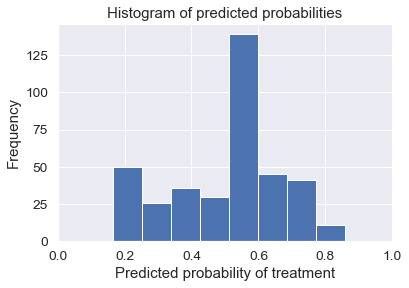

In [111]:
logisticRegression()

# KNeighbors Classifier


In [112]:
def Knn():
    
    knn = KNeighborsClassifier(n_neighbors=5)
    
   
    
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)
    
    
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    
    y_pred_class = knn.predict(X_test)
    
    print('########### KNeighborsClassifier ###############')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

   
    methodDict['KNN'] = accuracy_score * 100

Rand. Best Score:  0.6632253968253968
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 22}
[0.655, 0.658, 0.656, 0.656, 0.662, 0.656, 0.664, 0.656, 0.664, 0.66, 0.658, 0.662, 0.664, 0.651, 0.654, 0.654, 0.656, 0.663, 0.662, 0.662]
########### KNeighborsClassifier ###############
Accuracy: 0.6666666666666666
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0]


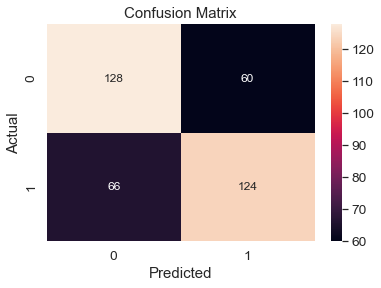

Classification Accuracy: 0.6666666666666666
Classification Error: 0.33333333333333337
False Positive Rate: 0.3191489361702128
Precision: 0.6739130434782609
AUC Score: 0.6667413213885779
Cross-validated AUC: 0.7275596717555003
First 10 predicted responses:
 [0 0 0 1 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.59259259 0.40740741]
 [0.51851852 0.48148148]
 [0.59259259 0.40740741]
 [0.11111111 0.88888889]
 [0.51851852 0.48148148]
 [0.25925926 0.74074074]
 [0.77777778 0.22222222]
 [0.51851852 0.48148148]
 [0.2962963  0.7037037 ]
 [0.37037037 0.62962963]]


TypeError: binarize() takes 1 positional argument but 2 were given

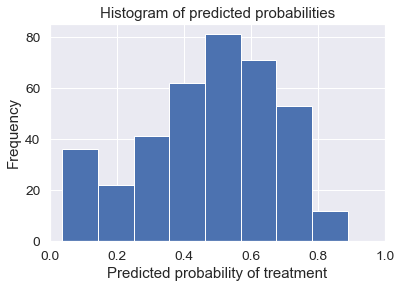

In [113]:
Knn()

# Decision Tree classifier

In [114]:
def treeClassifier():
    
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    
   
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
   
    y_pred_class = tree.predict(X_test)
    
    print('########### Tree classifier ###############')
    
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    
    methodDict['Tree clas.'] = accuracy_score * 100

Rand. Best Score:  0.6402031746031746
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.639, 0.643, 0.637, 0.639, 0.633, 0.646, 0.646, 0.637, 0.663, 0.638, 0.67, 0.63, 0.647, 0.634, 0.647, 0.639, 0.643, 0.64, 0.643, 0.647]
########### Tree classifier ###############
Accuracy: 0.6137566137566137
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1]


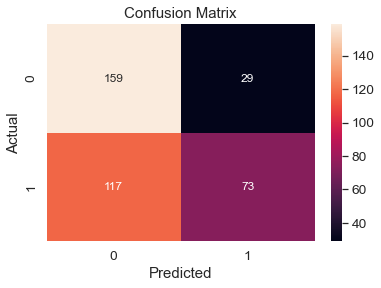

Classification Accuracy: 0.6137566137566137
Classification Error: 0.3862433862433863
False Positive Rate: 0.15425531914893617
Precision: 0.7156862745098039
AUC Score: 0.6149776035834267
Cross-validated AUC: 0.7021819301197181
First 10 predicted responses:
 [0 0 0 1 0 0 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.50581395 0.49418605]
 [0.50581395 0.49418605]
 [0.50581395 0.49418605]
 [0.27350427 0.72649573]
 [0.50581395 0.49418605]
 [0.50581395 0.49418605]
 [0.83333333 0.16666667]
 [0.50581395 0.49418605]
 [0.20833333 0.79166667]
 [0.09090909 0.90909091]]


TypeError: binarize() takes 1 positional argument but 2 were given

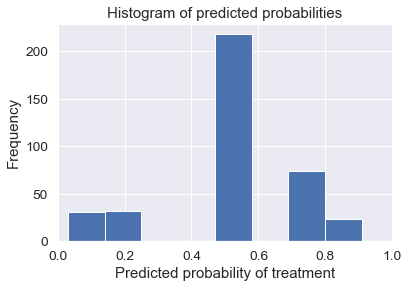

In [115]:
treeClassifier()

# Random Forests

In [116]:
def randomForest():
   
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)
    
    
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
    
    y_pred_class = my_forest.predict(X_test)
    
    print('########### Random Forests ###############')
    
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

   
    methodDict['R. Forest'] = accuracy_score * 100

Rand. Best Score:  0.6639746031746032
Rand. Best Params:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
[0.663, 0.661, 0.661, 0.654, 0.659, 0.67, 0.664, 0.663, 0.671, 0.662, 0.662, 0.669, 0.662, 0.661, 0.663, 0.669, 0.658, 0.657, 0.667, 0.659]
########### Random Forests ###############
Accuracy: 0.6507936507936508
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0]


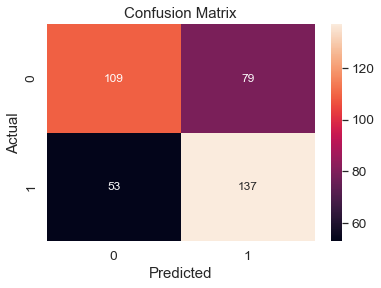

Classification Accuracy: 0.6507936507936508
Classification Error: 0.3492063492063492
False Positive Rate: 0.42021276595744683
Precision: 0.6342592592592593
AUC Score: 0.6504199328107503
Cross-validated AUC: 0.7233857951035849
First 10 predicted responses:
 [0 1 1 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.51997236 0.48002764]
 [0.49936425 0.50063575]
 [0.42257752 0.57742248]
 [0.18760097 0.81239903]
 [0.48765067 0.51234933]
 [0.27831247 0.72168753]
 [0.79484898 0.20515102]
 [0.39026022 0.60973978]
 [0.24403945 0.75596055]
 [0.27035451 0.72964549]]


TypeError: binarize() takes 1 positional argument but 2 were given

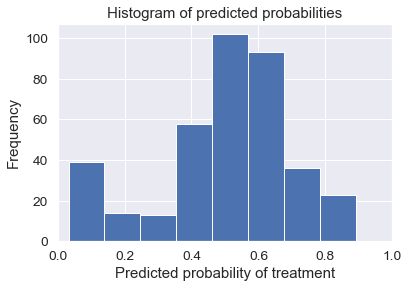

In [117]:
randomForest()

# Bagging

In [118]:
def bagging():
   
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    
    y_pred_class = bag.predict(X_test)
    
    print('########### Bagging ###############')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    
    methodDict['Bagging'] = accuracy_score * 100

########### Bagging ###############
Accuracy: 0.6190476190476191
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0]


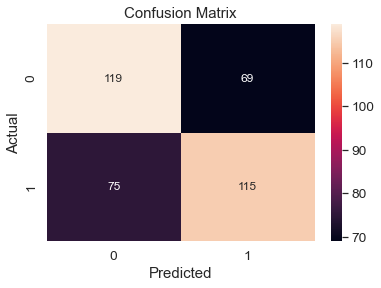

Classification Accuracy: 0.6190476190476191
Classification Error: 0.38095238095238093
False Positive Rate: 0.3670212765957447
Precision: 0.625
AUC Score: 0.619120940649496
Cross-validated AUC: 0.6666659237619779
First 10 predicted responses:
 [0 1 1 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.6094697  0.3905303 ]
 [0.20166667 0.79833333]
 [0.36857143 0.63142857]
 [0.         1.        ]
 [0.4602381  0.5397619 ]
 [0.         1.        ]
 [1.         0.        ]
 [0.28833333 0.71166667]
 [0.1        0.9       ]
 [0.         1.        ]]


TypeError: binarize() takes 1 positional argument but 2 were given

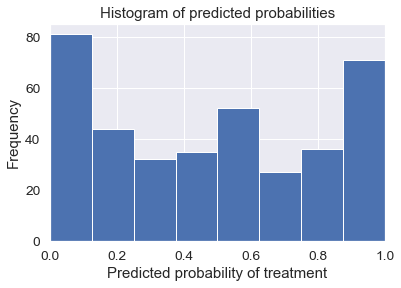

In [119]:
bagging()

# Boosting

In [120]:
def boosting():
     
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
    
    y_pred_class = boost.predict(X_test)
    
    print('########### Boosting ###############')
    
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    
    methodDict['Boosting'] = accuracy_score * 100

########### Boosting ###############
Accuracy: 0.6878306878306878
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0]


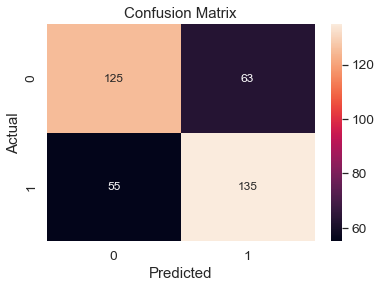

Classification Accuracy: 0.6878306878306878
Classification Error: 0.3121693121693122
False Positive Rate: 0.3351063829787234
Precision: 0.6818181818181818
AUC Score: 0.6877099664053752
Cross-validated AUC: 0.7086393433941678
First 10 predicted responses:
 [0 1 0 1 0 0 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.50020831 0.49979169]
 [0.49989543 0.50010457]
 [0.50014894 0.49985106]
 [0.49900982 0.50099018]
 [0.50047008 0.49952992]
 [0.50013405 0.49986595]
 [0.50101893 0.49898107]
 [0.49973714 0.50026286]
 [0.48780809 0.51219191]
 [0.49898618 0.50101382]]


TypeError: binarize() takes 1 positional argument but 2 were given

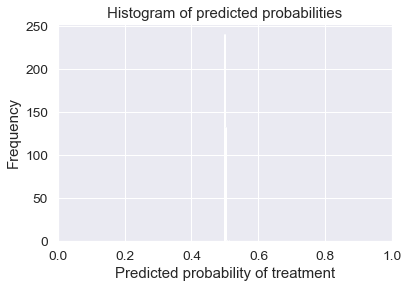

In [121]:
boosting()

# Stacking

In [123]:
def stacking():
    
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)
    
   
    y_pred_class = stack.predict(X_test)
    
    print('########### Stacking ###############')
    
    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100
    

########### Stacking ###############
Accuracy: 0.6455026455026455
Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64
Percentage of ones: 0.5026455026455027
Percentage of zeros: 0.4973544973544973
True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]
Pred: [0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0]


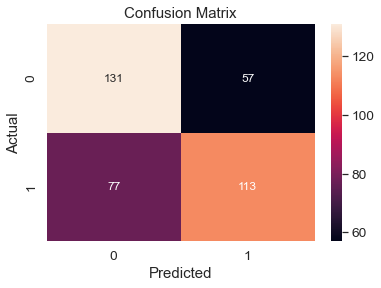

Classification Accuracy: 0.6455026455026455
Classification Error: 0.35449735449735453
False Positive Rate: 0.30319148936170215
Precision: 0.6647058823529411
AUC Score: 0.6457726763717805
Cross-validated AUC: 0.6699587249774461
First 10 predicted responses:
 [0 1 1 1 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.53551266 0.46448734]
 [0.16077745 0.83922255]
 [0.47444743 0.52555257]
 [0.10829953 0.89170047]
 [0.16077745 0.83922255]
 [0.10829953 0.89170047]
 [0.89550235 0.10449765]
 [0.36399321 0.63600679]
 [0.10829953 0.89170047]
 [0.10829953 0.89170047]]


TypeError: binarize() takes 1 positional argument but 2 were given

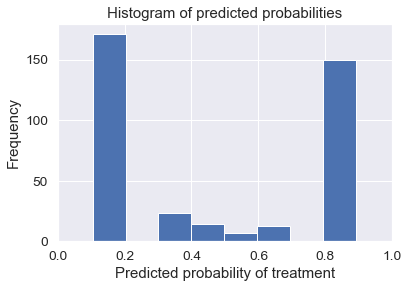

In [124]:
stacking()

# Predicting with Neural Network

In [125]:
import tensorflow as tf
import argparse


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

   
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

   
    return dataset

A feature column is an object describing how the model should use raw input data from the features dictionary. When you build an Estimator model, you pass it a list of feature columns that describes each of the features you want the model to use.

In [127]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
self_employed = tf.feature_column.numeric_column("self_employed")
no_employees = tf.feature_column.numeric_column("no_employees")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history,self_employed , no_employees, anonymity, leave, work_interfere]

In [ ]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model =  tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    tf.compat.v1.train.AdamOptimizer()
                                      learning_rate=[1.0],
                                      l1_regularization_strength=0.001
                                     )

In [23]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [27]:
data = binary_encode(
    data,
    columns=binary_features,
    positive_values=binary_positive_values
)

data = ordinal_encode(
    data,
    columns=ordinal_features,
    orderings=ordinal_orderings
)

data = onehot_encode(
    data,
    columns=nominal_features,
    prefixes=nominal_prefixes
)

ValueError: 3 is not in list

In [28]:
data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,Yes,3,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,No,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,No,1,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,0,Yes,3,2,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,0,0,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,0,Yes,3,2,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1256,34,1,0,0,Yes,2,5,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1257,46,0,0,0,No,2,3,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [29]:
data = binary_encode(data, columns=['treatment'], positive_values=['Yes'])

In [30]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))


Remaining non-numeric columns: 0


In [31]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [32]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [33]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [35]:
X.shape

(1259, 149)

In [36]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean() * 100, (1 - y_train.mean()) * 100))

Class Distribution (Positive to Negative): 49.7% / 50.3%


In [38]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 [==============================] - 1s 55ms/step - loss: 0.7168 - accuracy: 0.6065 - auc: 0.6526 - val_loss: 0.7320 - val_accuracy: 0.6158 - val_auc: 0.6386 - lr: 0.0010
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.4882 - accuracy: 0.7642 - auc: 0.8477 - val_loss: 0.7741 - val_accuracy: 0.5763 - val_auc: 0.6355 - lr: 0.0010
Epoch 3/50
11/11 [==============================] - 0s 20ms/step - loss: 0.3686 - accuracy: 0.8366 - auc: 0.9235 - val_loss: 0.8206 - val_accuracy: 0.6441 - val_auc: 0.6510 - lr: 0.0010
Epoch 4/50
11/11 [==============================] - 0s 19ms/step - loss: 0.2892 - accuracy: 0.8892 - auc: 0.9573 - val_loss: 0.9409 - val_accuracy: 0.5932 - val_auc: 0.6469 - lr: 0.0010
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.2166 - accuracy: 0.9233 - auc: 0.9802 - val_loss: 1.0254 - val_accuracy: 0.5876 - val_auc: 0.6476 - lr: 0.0010
Epoch 6/50
11/11 [==============================] - 0s 18ms/step - los

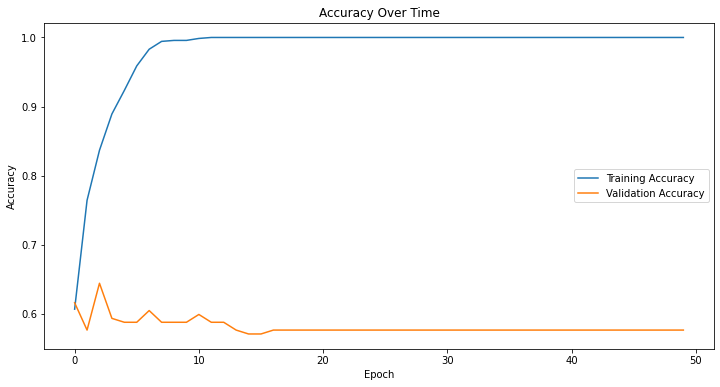

In [39]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()


In [40]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 1.9403 - accuracy: 0.6402 - auc: 0.6806


[1.9402501583099365, 0.6402116417884827, 0.6805676221847534]

In [ ]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

In [ ]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

In [ ]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    
   
    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

# Success method plot

In [13]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

In [15]:
plotSuccess()

NameError: name 'pd' is not defined

# Creating predictions on test set

In [ ]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()